<a href="https://colab.research.google.com/github/adityamishra5050/Coronavirus-tweets-NLP---Text-Classification-/blob/main/NLU_ass_1_task1_task2_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import model_selection, svm
from sklearn.model_selection import train_test_split
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
Corona_NLP_train = pd.read_csv('/content/drive/MyDrive/Corona_NLP_train.csv',encoding='latin-1')

In [ ]:
Corona_NLP_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
Corona_NLP_train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
Corona_NLP_test = pd.read_csv('/content/drive/MyDrive/Corona_NLP_test.csv',encoding='latin-1')

In [ ]:
Corona_NLP_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# **Combining both data**


In [ ]:
def blend(df1,df2):
    blended_data = pd.concat([df1, df2], axis = 0)
    blended_data = blended_data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis = 1)
    blended_data['Sentiment'] = blended_data['Sentiment'].replace({'Extremely Positive' : 'Positive','Extremely Negative' : 'Negative' })
    blended_data['Sentiment'] = blended_data['Sentiment'].replace({'Positive' : 0, 'Negative' : 1, 'Neutral' : 2})
    return blended_data

In [ ]:
final_combinded_data = blend(Corona_NLP_train, Corona_NLP_test)

In [ ]:
final_combinded_data.shape

(44955, 2)

# **Text cleaning**
   

>1) Lower all the text

In [ ]:
final_combinded_data['OriginalTweet'] = final_combinded_data['OriginalTweet'].apply(lambda x : x.lower())

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 10.5 MB/s eta 0:00:00


# **2) Remove digits and words containing digits**

In [ ]:
import re

In [ ]:
final_combinded_data['OriginalTweet']=final_combinded_data['OriginalTweet'].apply(lambda x: re.sub('\w*\d\w*','', x))

# **3) Expanding Contracted Words**

In [ ]:
import contractions
final_combinded_data['OriginalTweet'] = final_combinded_data["OriginalTweet"].apply(lambda x : contractions.fix(x))

# **4)Removing Non-sensical Words**

In [ ]:
final_combinded_data['OriginalTweet'] = [re.sub('\n', '', x) for x in final_combinded_data['OriginalTweet']]

In [ ]:
final_combinded_data['OriginalTweet']

0       @menyrbie @phil_gahan @chrisitv https://t.co/ ...
1       advice talk to your neighbours family to excha...
2       coronavirus australia: woolworths to give elde...
3       my food stock is not the only one which is emp...
4       me, ready to go at supermarket during the # ou...
                              ...                        
3793    meanwhile in a supermarket in israel -- people...
3794    did you panic buy a lot of non-perishable item...
3795    asst prof of economics @cconces was on @nbcphi...
3796    gov need to do something is instead of biar je...
3797    i and @forestandpaper members are committed to...
Name: OriginalTweet, Length: 44955, dtype: object

# **5)Remove Punctuations**

In [ ]:
import string

In [ ]:
final_combinded_data['OriginalTweet'] = final_combinded_data["OriginalTweet"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# **6)Removing Extra Spaces**

In [ ]:
final_combinded_data['OriginalTweet'] = final_combinded_data["OriginalTweet"].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
final_combinded_data['OriginalTweet']

0       menyrbie philgahan chrisitv httpstco and https...
1       advice talk to your neighbours family to excha...
2       coronavirus australia woolworths to give elder...
3       my food stock is not the only one which is emp...
4       me ready to go at supermarket during the outbr...
                              ...                        
3793    meanwhile in a supermarket in israel people da...
3794    did you panic buy a lot of nonperishable items...
3795    asst prof of economics cconces was on nbcphila...
3796    gov need to do something is instead of biar je...
3797    i and forestandpaper members are committed to ...
Name: OriginalTweet, Length: 44955, dtype: object

# **7)Removing Stopwords and Lemmatization**

In [ ]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
final_combinded_data['Final_text']=final_combinded_data['OriginalTweet'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
final_combinded_data['Final_text'] = [re.sub('httpstco', '', x) for x in final_combinded_data['Final_text']]

In [ ]:
final_combinded_data['Final_text']

0                          menyrbie philgahan chrisitv   
1       advice talk neighbour family exchange phone nu...
2       coronavirus australia woolworth elderly disabl...
3       food stock \r\r\r\r panic food need \r\r stay ...
4       ready supermarket outbreak \r\r\r\r paranoid f...
                              ...                        
3793    supermarket israel people dance sing stay posi...
3794    panic buy lot nonperishable item echo need foo...
3795    asst prof economics cconce nbcphiladelphia tal...
3796    gov need instead biar je rakyat assume lockdow...
3797    forestandpaper member committed safety employe...
Name: Final_text, Length: 44955, dtype: object

# **8)Making word Clouds**

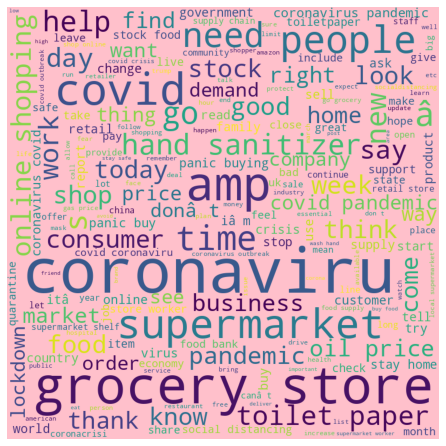

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''

# iterate through the csv file
for val in final_combinded_data['Final_text']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='Pink',
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = "White")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **Train-Test Split**

In [ ]:
Covid_x_training1,covid_x_testing, covid_y_training1, covid_y_testing = train_test_split(final_combinded_data['Final_text'], final_combinded_data['Sentiment'], test_size = 0.25, shuffle = True, random_state = 1)

In [ ]:
final_x_training_data,final_x_validataion_data, final_y_training_data, final_y_validation_data = train_test_split(Covid_x_training1,covid_y_training1, test_size = 0.25, shuffle = True, random_state = 1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
features = cv.fit_transform(final_x_training_data)

# **Naive Bayes Model Using CountVectorization**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(features, final_y_training_data)

MultinomialNB()

In [ ]:
features_test = cv.transform(final_x_validataion_data)

In [ ]:
print('Model Accuracy : {:.3f}%'.format(model2.score(features_test, final_y_validation_data)*100))

Model Accuracy : 66.070%


In [ ]:
features_test1 = cv.transform(covid_x_testing)

In [ ]:
print('Model Accuracy : {:.3f}%'.format(model2.score(features_test1, covid_y_testing)*100))

Model Accuracy : 66.527%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

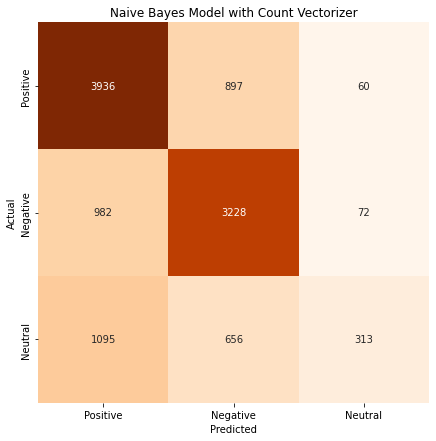

Classification Report 
               precision    recall  f1-score   support

    Positive       0.65      0.80      0.72      4893
    Negative       0.68      0.75      0.71      4282
     Neutral       0.70      0.15      0.25      2064

    accuracy                           0.67     11239
   macro avg       0.68      0.57      0.56     11239
weighted avg       0.67      0.67      0.63     11239



In [ ]:
collection_of_result = model2.predict(features_test1)
cm = confusion_matrix(covid_y_testing, collection_of_result, labels = [0,1,2])
clr = classification_report(covid_y_testing, collection_of_result,labels = [0,1,2], target_names = ['Positive', 'Negative', 'Neutral'])
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0.5, 1.5, 2.5],labels = ['Positive', 'Negative', 'Neutral'])
plt.yticks(ticks = [0.5, 1.5, 2.5],labels = ['Positive', 'Negative', 'Neutral'])
plt.title('Naive Bayes Model with Count Vectorizer')
plt.show()
print('Classification Report \n', clr)

# **Naive Bayes Model Using TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer(min_df=3, ngram_range=[1,4]).fit(final_x_training_data)
X_train_vect_TFID = vect.transform(final_x_training_data)
X_val_vect_TFID = vect.transform(final_x_validataion_data)
X_test_vect_TFID = vect.transform(covid_x_testing)

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [ ]:
def multiclass_roc_auc_score(covid_y_testing, prediction_of_y, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(covid_y_testing)
    covid_y_testing = lb.transform(covid_y_testing)
    prediction_of_y = lb.transform(prediction_of_y)
    return roc_auc_score(covid_y_testing, prediction_of_y, average=average)

In [ ]:
print("MultinomialNB with Tfid Vectorizer\n")
alpha = [0.1]
for value in alpha:
    model = MultinomialNB(alpha = value).fit(X_train_vect_TFID, final_y_training_data)
    y_predicted = model.predict(X_val_vect_TFID)
    score = multiclass_roc_auc_score(final_y_validation_data, y_predicted)
    acc_score = accuracy_score(final_y_validation_data, y_predicted)
    print(f"With alpha set to {value}, AUC score of model is {score} and Accuracy score is {acc_score}\n")

MultinomialNB with Tfid Vectorizer

With alpha set to 0.1, AUC score of model is 0.693868787655605 and Accuracy score is 0.6494246055285324



In [ ]:
print("MultinomialNB with Tfid Vectorizer\n")
alpha = [0.1]
for value in alpha:
    y_predicted = model.predict(X_test_vect_TFID)
    score = multiclass_roc_auc_score(covid_y_testing, y_predicted)
    acc_score = accuracy_score(covid_y_testing, y_predicted)
    print(f"With alpha set to {value}, AUC score of model is {score} and Accuracy score is {acc_score}\n")

MultinomialNB with Tfid Vectorizer

With alpha set to 0.1, AUC score of model is 0.7018393679699443 and Accuracy score is 0.6608239167185692



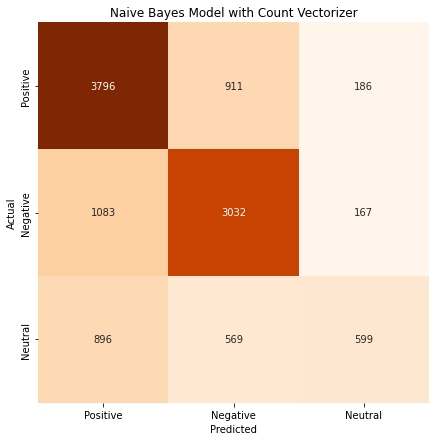

Classification Report 
               precision    recall  f1-score   support

    Positive       0.66      0.78      0.71      4893
    Negative       0.67      0.71      0.69      4282
     Neutral       0.63      0.29      0.40      2064

    accuracy                           0.66     11239
   macro avg       0.65      0.59      0.60     11239
weighted avg       0.66      0.66      0.65     11239



In [ ]:
collection_of_result1 = model.predict(X_test_vect_TFID)
cm1 = confusion_matrix(covid_y_testing, collection_of_result1, labels = [0,1,2])
clr1 = classification_report(covid_y_testing, collection_of_result1,labels = [0,1,2], target_names = ['Positive', 'Negative', 'Neutral'])
plt.figure(figsize = (7,7))
sns.heatmap(cm1, annot = True, fmt = 'g', cbar = False, cmap = 'Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0.5, 1.5, 2.5],labels = ['Positive', 'Negative', 'Neutral'])
plt.yticks(ticks = [0.5, 1.5, 2.5],labels = ['Positive', 'Negative', 'Neutral'])
plt.title('Naive Bayes Model with Count Vectorizer')
plt.show()
print('Classification Report \n', clr1)

# **Model a Decision Tree with TF-IDF features**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print("DecisionTreeClassifier with TF-IDF\n")
depth = [3,6,9,12,15,20]
for value in depth:
    model_tree = DecisionTreeClassifier(max_depth = value).fit(X_train_vect_TFID, final_y_training_data)
    y_predicted = model_tree.predict(X_val_vect_TFID)
    score = multiclass_roc_auc_score(final_y_validation_data, y_predicted)
    acc_score = accuracy_score(final_y_validation_data, y_predicted)
    print(f"With max_depth set to {value}, AUC score of model is {score} and Accuracy score is {acc_score}\n")

DecisionTreeClassifier with TF-IDF

With max_depth set to 3, AUC score of model is 0.5452954201434449 and Accuracy score is 0.4895005338711591

With max_depth set to 6, AUC score of model is 0.5447000542992533 and Accuracy score is 0.48867006762368015

With max_depth set to 9, AUC score of model is 0.587659556681361 and Accuracy score is 0.5249733064420453

With max_depth set to 12, AUC score of model is 0.6295735574666744 and Accuracy score is 0.5427690117451655

With max_depth set to 15, AUC score of model is 0.6364399410449862 and Accuracy score is 0.5538023490331

With max_depth set to 20, AUC score of model is 0.6538059448658813 and Accuracy score is 0.5659034286392217



In [ ]:
print("DecisionTreeClassifier with TF-IDF\n")
y_predicted = model_tree.predict(X_test_vect_TFID)
score = multiclass_roc_auc_score(covid_y_testing, y_predicted)
acc_score = accuracy_score(covid_y_testing, y_predicted)
print(f"With max_depth set to {value}, AUC score of model is {score} and Accuracy score is {acc_score}\n")

DecisionTreeClassifier with TF-IDF

With max_depth set to 20, AUC score of model is 0.6525028880770621 and Accuracy score is 0.5612598985674883



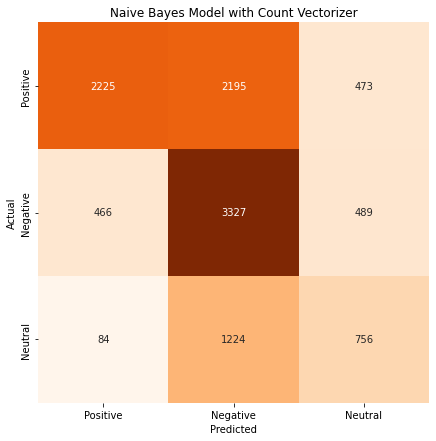

Classification Report 
               precision    recall  f1-score   support

    Positive       0.80      0.45      0.58      4893
    Negative       0.49      0.78      0.60      4282
     Neutral       0.44      0.37      0.40      2064

    accuracy                           0.56     11239
   macro avg       0.58      0.53      0.53     11239
weighted avg       0.62      0.56      0.56     11239



In [ ]:
collection_of_result2 = model_tree.predict(X_test_vect_TFID)
cm2 = confusion_matrix(covid_y_testing, collection_of_result2, labels = [0,1,2])
clr2 = classification_report(covid_y_testing, collection_of_result2,labels = [0,1,2], target_names = ['Positive', 'Negative', 'Neutral'])
plt.figure(figsize = (7,7))
sns.heatmap(cm2, annot = True, fmt = 'g', cbar = False, cmap = 'Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0.5, 1.5, 2.5],labels = ['Positive', 'Negative', 'Neutral'])
plt.yticks(ticks = [0.5, 1.5, 2.5],labels = ['Positive', 'Negative', 'Neutral'])
plt.title('Naive Bayes Model with Count Vectorizer')
plt.show()
print('Classification Report \n', clr2)